 <a name="topo"></a>

Exercício retirado do site Kaggle e explorado no curso Data Sciente e Machine Learning.

# Sumário

1. [O Naufrágio do Titanic](#titanic)
2. [Análise Exploratória de Dados (AED)](#aed)  
3. [Visualização de Dados](#vidados)
4. [Engenharia de Recursos](#engenharia)
5. [Machine Learning](#ml)
6. [Validação Cruzada _(Cross-Validation)_](#cv)
7. [Matriz de Confusão](#matrix)
8. [Curvas ROC e AUC](#rocauc)
9. [Customização de Hyper-Parâmetros](#hyperparam)
10. [Ensembling](#ensembling)
11. [Importância de Recursos](#fimportance)
12. [Submissão](#submissao)             

 <a name="titanic"></a>

# O Naufrágio do Titanic
<img src="titanic.jpg" width=100%>

O naufrágio do Titanic é um dos mais infames naufrágios da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia barcos salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Nesse desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipo de pessoas têm maior probabilidade de sobreviver?” Usando dados de passageiros (por exemplo, nome, idade, sexo, classe socioeconômica etc.).

Página da Competição: https://www.kaggle.com/c/titanic

Fontes de Consulta: 
* https://www.kaggle.com/startupsci/titanic-data-science-solutions
* https://www.kaggle.com/ash316/eda-to-prediction-dietanic
* https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
* https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
* https://www.kaggle.com/cdeotte/titanic-using-name-only-0-81818
* https://www.kaggle.com/cdeotte/titantic-mega-model-0-84210
* https://www.kaggle.com/cdeotte/titanic-wcg-xgboost-0-84688
* https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
* https://www.kaggle.com/reisel/save-the-families
* https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic
<br>

[início](#topo)

 <a name="aed"></a>

## Análise Exploratória de Dados (AED)
Esse passo é essencial, pois é através dele que iremos construir um entendimento intuitivo dos dados, entender como os parâmetros estão relacionados, procurar e encontrar tendências e relações entre diferentes parâmetros.

<br>

[início](#topo)

### Importar bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

### Ler train e test

In [ ]:
train = pd.read_csv('D:/Trabalho/DataScience/GitHub/Portfolio/Classification_survivors_titanic_train.csv') #Coma Separated Values

In [ ]:
test = pd.read_csv('D:/Trabalho/DataScience/GitHub/Portfolio/Classification_survivors_titanic_test.csv') #Coma Separated Values

### transformar definir o Id do Passageiro como Index

In [ ]:
train.set_index('PassengerId', inplace = True)

In [ ]:
test.set_index('PassengerId', inplace = True)

### Verificar shape dos dois

In [ ]:
train.shape, test.shape

((891, 11), (418, 10))

In [ ]:
data = pd.concat([train, test], sort = True)

In [ ]:
data.shape

(1309, 11)

### Traduzir Colunas

In [ ]:
data.columns = ['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe', 'Sexo',
       'IrmaosConjuges', 'Sobreviveu', 'Bilhete']

In [ ]:
data.head()

,Idade,Cabine,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjuges,Sobreviveu,Bilhete
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


### Mapear Sexo para "homem" e "mulher"

In [ ]:
sexo = {'male':'homem', 'female': 'mulher'}

In [ ]:
data['Sexo'] = data['Sexo'].map(sexo)

In [ ]:
data.head(2)

,Idade,Cabine,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjuges,Sobreviveu,Bilhete
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,homem,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,mulher,1,1.0,PC 17599


 <a name="paracat"></a>

### Parâmetros Categóricos  <a name="nom"></a>
* ### Nominais

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Idade           1046 non-null   float64
 1   Cabine          295 non-null    object 
 2   Embarque        1307 non-null   object 
 3   Tarifa          1308 non-null   float64
 4   Nome            1309 non-null   object 
 5   PaisFilhos      1309 non-null   int64  
 6   Classe          1309 non-null   int64  
 7   Sexo            1309 non-null   object 
 8   IrmaosConjuges  1309 non-null   int64  
 9   Sobreviveu      891 non-null    float64
 10  Bilhete         1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [ ]:
#Sexo, Sobreviveu, Embarque, Cabine

 <a name="ord"></a>

* ### Ordinais

In [ ]:
#Classe

 <a name="paranum"></a>

### Parâmetros Numéricos  <a name="cont"></a>
* ### Contínuos

In [ ]:
#Idade, tarifa

 <a name="disc"></a>

* ### Discretos

In [ ]:
#PaisFIlhos IrmaosConjuges

 <a name="paraalfa"></a>

### Parâmetros Alfanuméricos

In [ ]:
#bilhete

 <a name="missing"></a>

### Dados incompletos (faltando dados)

In [ ]:
data.isnull().sum()

Idade              263
Cabine            1014
Embarque             2
Tarifa               1
Nome                 0
PaisFilhos           0
Classe               0
Sexo                 0
IrmaosConjuges       0
Sobreviveu         418
Bilhete              0
dtype: int64

<a name="numinfo"></a>

### Preencher Embarque com Moda

In [ ]:
moda_embarque = data['Embarque'].mode()[0]

In [ ]:
data['Embarque'].fillna(moda_embarque, inplace = True)

### Informações Gerais (Parâmetros Numéricos)

In [ ]:
data.describe()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuges,Sobreviveu
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


 <a name="catinfo"></a>

### Informações Gerais de Parâmetros Categóricos

In [ ]:
data.describe(include=['O'])

,Cabine,Embarque,Nome,Sexo,Bilhete
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Kelly, Mr. James",homem,CA. 2343
freq,6,916,2,843,11


 <a name="infoamostra"></a>

## Informações da Amostra

<br>

[início](#topo)

### Tamanho da Amostra

In [ ]:
len(data)

1309

### Proporção Total da Amostra em relação à População

In [ ]:
len(train)/2224

0.4006294964028777

### Proporção de Sobreviventes (População)

In [ ]:
1-1502/2224

0.32464028776978415

### Proporção de Sobreviventes (Amostra)

In [ ]:
train['Survived'].sum()/len(train)

0.3838383838383838

 <a name="agrupamentos"></a>

# Agrupamentos

<br>

[início](#topo)

### Agrupar Classe x Sobrevivência

In [ ]:
data[['Classe', 'Sobreviveu']].groupby(['Classe']).mean().sort_values(by='Sobreviveu', ascending = False)

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


* Passageiros de Primeira Classe são muito mais propensos a sobreviver do que de Segunda e Terceira Classe
* Passageiros de Segunda Classe são menos propensos a sobreviver do que de Primeira Classe, mas são mais propensos a sobreviver do que de Terceira Classe

### Agrupar Sexo x Sobrevivência

In [ ]:
data[['Sexo', 'Sobreviveu']].groupby(['Sexo']).mean().sort_values(by='Sobreviveu', ascending = False)

,Sobreviveu
Sexo,
mulher,0.742038
homem,0.188908


* 74% das mulheres sobreviveram em contraste com 18,89% dos homens da nossa amostra

### Agrupar IrmaosConjuge x Sobrevivência

In [ ]:
data[['IrmaosConjuges', 'Sobreviveu']].groupby(['IrmaosConjuges']).mean().sort_values(by='Sobreviveu', ascending = True)

,Sobreviveu
IrmaosConjuges,
5,0.000000
8,0.000000
4,0.166667
3,0.250000
0,0.345395
2,0.464286
1,0.535885


### Agrupar PaisFilhos x Sobrevivência

In [ ]:
data[['PaisFilhos', 'Sobreviveu']].groupby(['PaisFilhos']).mean().sort_values(by='Sobreviveu', ascending = True)

,Sobreviveu
PaisFilhos,
4,0.000000
6,0.000000
5,0.200000
0,0.343658
2,0.500000
1,0.550847
3,0.600000
9,NaN


### Correlação de IrmaosConjuge e PaisFilhos

In [ ]:
data[['IrmaosConjuges', 'PaisFilhos']].corr()

,IrmaosConjuges,PaisFilhos
IrmaosConjuges,1.000000,0.373587
PaisFilhos,0.373587,1.000000


* IrmaosConjuge e PaisFilhos não possuem uma correlação muito forte. Talvez seja o caso juntá-los como um único recurso depois

 <a name="vidados"></a>

# Visualização de Dados
Observar os dados de forma visual para averiguar as suposições feitas até agora

<br>

[início](#topo)

### Gráfico de Barras e Pizza de Sobreviventes

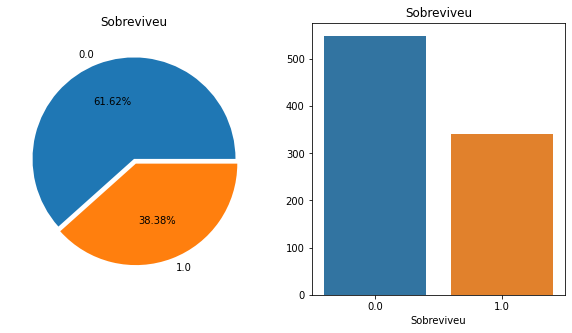

In [ ]:
f,ax=plt.subplots(1,2, figsize=(10,5))
data['Sobreviveu'].value_counts().plot.pie(explode=[0,0.05], autopct='%0.2f%%', ax=ax[0])
ax[0].set_title('Sobreviveu')
ax[0].set_ylabel('')
sns.countplot('Sobreviveu', data=data, ax=ax[1])
ax[1].set_title('Sobreviveu')
ax[1].set_ylabel('')
plt.show()

## Sobrevivência Por Sexo

In [ ]:
data.groupby(['Sexo', 'Sobreviveu'])['Sobreviveu'].count()

Sexo    Sobreviveu
homem   0.0           468
        1.0           109
mulher  0.0            81
        1.0           233
Name: Sobreviveu, dtype: int64

In [ ]:
data.loc[data['Sexo']=='mulher']['Sobreviveu'].value_counts()

1.0    233
0.0     81
Name: Sobreviveu, dtype: int64

<a name="barrassob"></a>

### Gráfico de Barras de Sobreviventes por Sexo

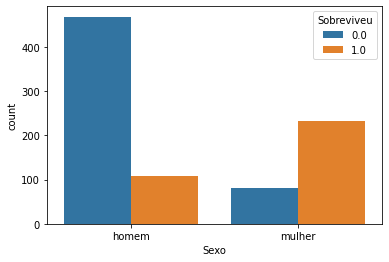

In [ ]:
sns.countplot('Sexo', hue='Sobreviveu', data=data)
plt.show()

<a name="histidsob"></a>

### Histograma de Idade x Sobreviveu

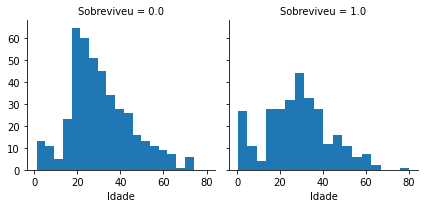

In [ ]:
g =sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist,'Idade',bins = 18)

* Crianças sobreviveram mais
* Passageiro mais idoso sobreviveu
* A maioria dos passageiros estão na faixa de 18-35 anos (E a maioria não sobreviveu)

<a name="histclassidsob"></a>

### Histograma de Idade x Classe x Sobreviveu com FacetGrid

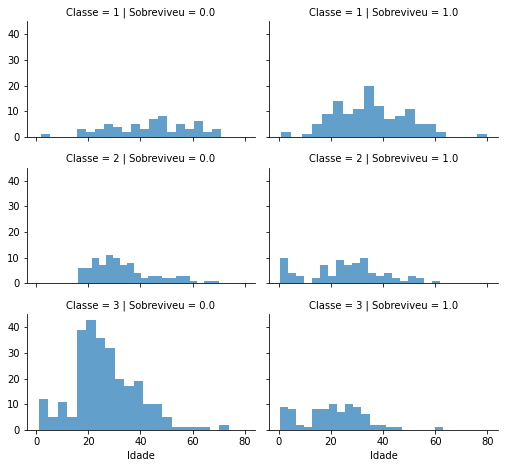

In [ ]:
grid =sns.FacetGrid(data, col='Sobreviveu', row = 'Classe', size = 2.2, aspect = 1.6)
grid.map(plt.hist,'Idade',alpha = 0.7, bins = 20)
grid.add_legend()
plt.show()

<a name="chancesporto"></a>

### Chances de Sobrevivência por Porto de Embarque

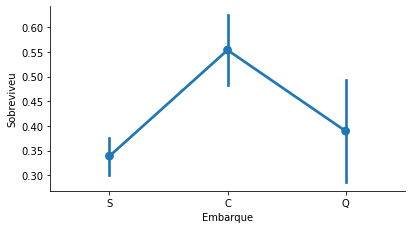

In [ ]:
sns.catplot('Embarque', 'Sobreviveu', data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)

<a name="pointplotembarque"></a>

### Embarque x Classe x Sobreviveu

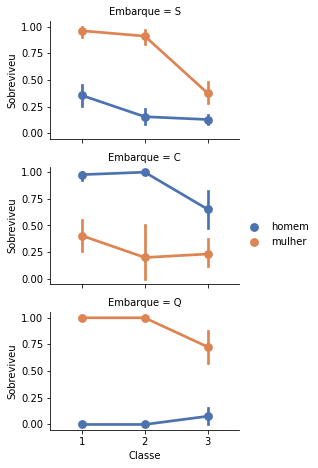

In [ ]:
grid = sns.FacetGrid(data, row='Embarque', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo', palette = 'deep')
grid.add_legend()
plt.show()

### Agrupar mulheres por sobrevivência

In [ ]:
data.loc[data['Sexo']=='mulher'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuges
Sobreviveu,,,,,
0.0,25.046875,23.024385,1.037037,2.851852,1.209877
1.0,28.847716,51.938573,0.515021,1.918455,0.515021


### Agrupar homens por sobrevivência

In [ ]:
data.loc[data['Sexo']=='homem'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuges
Sobreviveu,,,,,
0.0,31.618056,21.960993,0.207265,2.476496,0.440171
1.0,27.276022,40.821484,0.357798,2.018349,0.385321


<a name="graficobarras"></a>

### Gráfico de Barras Sexo x Tarifa por Sexo

<br>

[início](#topo)

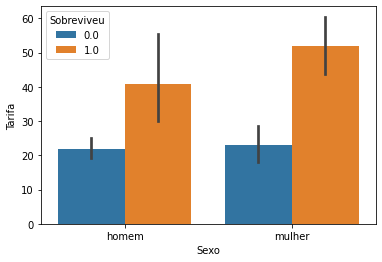

In [ ]:
sns.barplot('Sexo','Tarifa',hue='Sobreviveu',data=data)

<a name="graficobarrassex"></a>

### Gráfico de Barras Sexo x Tarifa x Embarque x Sobreviveu

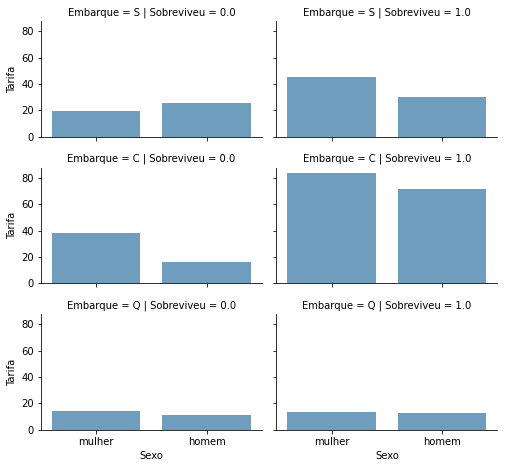

In [ ]:
grid = sns.FacetGrid(data, row='Embarque', col='Sobreviveu', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sexo', 'Tarifa', alpha=0.7, ci=None)
grid.add_legend()

<a name="pizza"></a>

### Crosstab de Sobrevivência por Classe

In [ ]:
pd.crosstab(data['Sobreviveu'],data['Classe'],margins=True)\
.style.background_gradient(cmap='OrRd')

Classe,1,2,3,All
Sobreviveu,,,,
0.0,80,97,372,549
1.0,136,87,119,342
All,216,184,491,891


<a name="vimissing"></a>

## Visualizando Dados Faltando

<br>

[início](#topo)

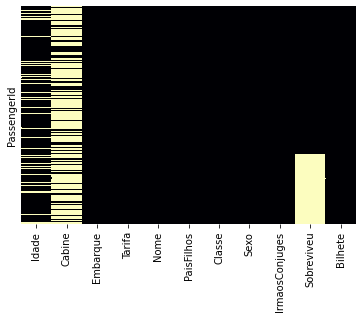

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='magma')

### Remover Cabine

In [ ]:
data.drop(['Cabine'],axis=1, inplace=True)

<a name="boxplot"></a>

### Boxplot de Classe por Sexo

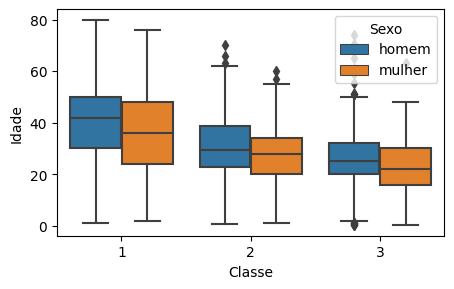

In [ ]:
plt.figure(figsize=(5,3),dpi=100)
sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=data)

<a name="engenharia"></a>

# Engenharia de Recursos

<br>

[início](#topo)

### Extrair Titulo do Nome

In [ ]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [ ]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [ ]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [ ]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Miss','Master','Mr','Mrs'] else x)

In [ ]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

In [ ]:
data.loc[data['Titulo']=='Master'].mean()

Idade              5.482642
Tarifa            36.008195
PaisFilhos         1.377049
Classe             2.655738
IrmaosConjuges     2.049180
Sobreviveu         0.575000
dtype: float64

In [ ]:
titulos_traduzidos = {
    'Master': 'Menino',
    'Miss': 'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs': 'Casada',
    'Outros': 'Outros'
}

In [ ]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

# Mulheres e Crianças sobreviveram ou morreram juntos?

## Extrair sobrenome para identificar possíveis famílias

In [ ]:
data['Nome'].str.split(',').str[0]

PassengerId
1              Braund
2             Cumings
3           Heikkinen
4            Futrelle
5               Allen
            ...      
1305          Spector
1306    Oliva y Ocana
1307          Saether
1308             Ware
1309            Peter
Name: Nome, Length: 1309, dtype: object

### Criar Feature Sobrenome da Família

In [ ]:
data['Sobrenome']=data['Nome'].str.split(',').str[0]

### Verificar as maiores famílias

In [ ]:
data.groupby(['Sobrenome'])['Nome'].count().sort_values(ascending=False)

Sobrenome
Sage         11
Andersson    11
Asplund       8
Goodwin       8
Davies        7
             ..
Moutal        1
Moussa        1
Moss          1
Morrow        1
Abbing        1
Name: Nome, Length: 875, dtype: int64

### Analisar Sobrevivência de Mulheres e Crianças da Família "Andersson"

In [ ]:
data[['Sobreviveu', 'Titulo', 'Sobrenome','Bilhete', 'Idade', 'PaisFilhos', 'IrmaosConjuges', 'Classe']].loc[data['Sobrenome']=='Andersson']\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete,Idade,PaisFilhos,IrmaosConjuges,Classe
PassengerId,,,,,,,,
69,1.0,Solteira,Andersson,3101281,17.0,2,4,3
120,0.0,Solteira,Andersson,347082,2.0,2,4,3
542,0.0,Solteira,Andersson,347082,9.0,2,4,3
543,0.0,Solteira,Andersson,347082,11.0,2,4,3
611,0.0,Casada,Andersson,347082,39.0,5,1,3
814,0.0,Solteira,Andersson,347082,6.0,2,4,3
851,0.0,Menino,Andersson,347082,4.0,2,4,3
1106,NaN,Solteira,Andersson,347091,38.0,2,4,3


### Mulheres e Crianças da Família "Sage"

In [ ]:
data[['Sobreviveu', 'Titulo', 'Sobrenome','Bilhete', 'Idade', 'PaisFilhos', 'IrmaosConjuges', 'Classe']].loc[data['Sobrenome']=='Sage']\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete,Idade,PaisFilhos,IrmaosConjuges,Classe
PassengerId,,,,,,,,
160,0.0,Menino,Sage,CA. 2343,NaN,2,8,3
181,0.0,Solteira,Sage,CA. 2343,NaN,2,8,3
793,0.0,Solteira,Sage,CA. 2343,NaN,2,8,3
864,0.0,Solteira,Sage,CA. 2343,NaN,2,8,3
1080,NaN,Solteira,Sage,CA. 2343,NaN,2,8,3
1252,NaN,Menino,Sage,CA. 2343,14.5,2,8,3
1257,NaN,Casada,Sage,CA. 2343,NaN,9,1,3


### Mulheres e Crianças da Família "Brown"

In [ ]:
data[['Sobreviveu', 'Titulo', 'Sobrenome','Bilhete', 'Idade', 'PaisFilhos', 'IrmaosConjuges', 'Classe']].loc[data['Sobrenome']=='Brown']\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete,Idade,PaisFilhos,IrmaosConjuges,Classe
PassengerId,,,,,,,,
195,1.0,Casada,Brown,PC 17610,44.0,0,0,1
346,1.0,Solteira,Brown,248733,24.0,0,0,2
671,1.0,Casada,Brown,29750,40.0,1,1,2
1067,NaN,Solteira,Brown,29750,15.0,2,0,2
1248,NaN,Casada,Brown,11769,59.0,0,2,1


### Criar DataFrame "MulherOuCrianca"

In [ ]:
mulheroucrianca = data.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]

In [ ]:
mulheroucrianca['Titulo'].unique()

array(['Casada', 'Solteira', 'Menino', 'Outros'], dtype=object)

### Criar Feature "TamanhoGrupo"
Referente a quantidade de Pessoas que possuem o mesmo sobrenome

In [ ]:
data['Tamanho Grupo']=data['Sobrenome'].apply(lambda x: mulheroucrianca.loc[mulheroucrianca['Sobrenome']==x]['Sobreviveu'].count())

In [ ]:
data[['Tamanho Grupo', 'Sobrenome', 'Titulo', 'Sobreviveu']].sort_values(by='Tamanho Grupo', ascending = False)

,Tamanho Grupo,Sobrenome,Titulo,Sobreviveu
PassengerId,,,,
1212,7,Andersson,HomemAdulto,NaN
69,7,Andersson,Solteira,1.0
611,7,Andersson,Casada,0.0
120,7,Andersson,Solteira,0.0
147,7,Andersson,HomemAdulto,1.0
...,...,...,...,...
772,0,Jensen,HomemAdulto,0.0
774,0,Elias,HomemAdulto,0.0
235,0,Leyson,HomemAdulto,0.0


### Sobrevivência Família "Andersson"

In [ ]:
data[['Tamanho Grupo', 'Sobrenome', 'Titulo', 'Sobreviveu']].sort_values(by='Tamanho Grupo', ascending = False).loc[data['Sobrenome']=='Andersson']

,Tamanho Grupo,Sobrenome,Titulo,Sobreviveu
PassengerId,,,,
1212,7,Andersson,HomemAdulto,NaN
69,7,Andersson,Solteira,1.0
611,7,Andersson,Casada,0.0
120,7,Andersson,Solteira,0.0
147,7,Andersson,HomemAdulto,1.0
1106,7,Andersson,Solteira,NaN
814,7,Andersson,Solteira,0.0
543,7,Andersson,Solteira,0.0
851,7,Andersson,Menino,0.0


In [ ]:
for idx, _ in data.iterrows():
    if data['Titulo'].at[idx] == 'HomemAdulto':
        data['Tamanho Grupo'].at[idx] = 0

### Criar Recurso "SobrevivenciaGrupo"

In [ ]:
data[['Titulo', 'Sobreviveu']].loc[data['Sobrenome']=='Andersson']\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')].mean()['Sobreviveu']

0.14285714285714285

In [ ]:
data['Sobrevivencia Grupo'] = data['Sobrenome'].apply(lambda x: data[['Titulo', 'Sobreviveu']].loc[data['Sobrenome']==x]\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')].mean()['Sobreviveu'])

In [ ]:
data.head()

,Idade,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjuges,Sobreviveu,Bilhete,Titulo,Sobrenome,Tamanho Grupo,Sobrevivencia Grupo
PassengerId,,,,,,,,,,,,,,
1,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,homem,1,0.0,A/5 21171,HomemAdulto,Braund,0,NaN
2,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,mulher,1,1.0,PC 17599,Casada,Cumings,1,1.0
3,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,mulher,0,1.0,STON/O2. 3101282,Solteira,Heikkinen,1,1.0
4,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,mulher,1,1.0,113803,Casada,Futrelle,1,1.0
5,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,homem,0,0.0,373450,HomemAdulto,Allen,0,1.0


In [ ]:
for idx, _ in data.iterrows():
    if data['Titulo'].at[idx] == 'HomemAdulto':
        data['Sobrevivencia Grupo'].at[idx] = 0

In [ ]:
data['Sobrevivencia Grupo'].isnull().sum()

119

In [ ]:
data['Sobrevivencia Grupo'].fillna(0, inplace = True)

In [ ]:
data['Sobrevivencia Grupo'].isnull().sum()

0

###  Grupos de Mulheres e Criancas onde todos morreram juntos

In [ ]:
data[['Sobrenome', 'Titulo', 'Sobreviveu']].loc[(data['Sobrevivencia Grupo']==0)&(data['Tamanho Grupo']>1)]\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Palsson', 'Rice', 'Vander Planke', 'Panula', 'Goodwin', 'Skoog',
       'Zabour', 'Jussila', 'Boulos', 'Ford', 'Sage', 'Lefebre', 'Strom',
       'Barbara', 'Van Impe', 'Bourke'], dtype=object)

### Quantidade de Pessoas (morreram)

In [ ]:
data[['Sobrenome', 'Titulo', 'Sobreviveu']].loc[(data['Sobrevivencia Grupo']==0)&(data['Tamanho Grupo']>1)]\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]['Sobreviveu'].count()

50

###  Grupos de Mulheres e Criancas onde todos sobreviveram juntos

In [ ]:
data[['Sobrenome', 'Titulo', 'Sobreviveu']].loc[(data['Sobrevivencia Grupo']==1)&(data['Tamanho Grupo']>1)]\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Johnson', 'Sandstrom', 'Nicola-Yarred', 'Laroche', 'Harper',
       'West', 'Moubarek', 'Caldwell', 'Fortune', 'Doling', 'Peter',
       'Goldsmith', 'Becker', 'Navratil', 'Brown', 'Newell', 'Collyer',
       'Murphy', 'Hamalainen', 'Graham', 'Mellinger', 'Kelly', 'Hays',
       'Ryerson', 'Wick', 'Hippach', 'Coutts', 'Richards', 'Hart',
       'Baclini', 'Quick', 'Taussig', 'Herman', 'Moor'], dtype=object)

### Quantidade de Pessoas (sobreviveram)

In [ ]:
data[['Sobrenome', 'Titulo', 'Sobreviveu']].loc[(data['Sobrevivencia Grupo']==1)&(data['Tamanho Grupo']>1)]\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]['Sobreviveu'].count()

74

###  Grupos de Mulheres e Criancas com sobrevivência mista

In [ ]:
data[['Sobrenome', 'Titulo']].loc[(data['Sobrevivencia Grupo']>0)& (data['Sobrevivencia Grupo']<1) &(data['Tamanho Grupo']>1)]\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Asplund', 'Andersson', 'Allison', 'Carter'], dtype=object)

### Quantidade de Pessoas (sobrevivência mista)

In [ ]:
data[['Sobrenome', 'Titulo', 'Sobreviveu']].loc[(data['Sobrevivencia Grupo']>0)& (data['Sobrevivencia Grupo']<1) &(data['Tamanho Grupo']>1)]\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]['Sobreviveu'].count()

18

### Criar Recurso ExpecativaDeVida

In [ ]:
data['Expectativa de vida']=''
#viver
#morrer
#desconhecido
for idx, _ in data.iterrows():
  if (data['Sobrevivencia Grupo'].at[idx]==0) & (data['Tamanho Grupo'].at[idx]>1):
    data['Expectativa de vida'].at[idx]='morrer'
  elif (data['Sobrevivencia Grupo'].at[idx]==1) & (data['Tamanho Grupo'].at[idx]>1):
    data['Expectativa de vida'].at[idx]='viver'
  else:
    data['Expectativa de vida'].at[idx]='desconhecido'

In [ ]:
pd.crosstab(data['Expectativa de vida'], data['Sobreviveu'])

Sobreviveu,0.0,1.0
Expectativa de vida,,
desconhecido,498,268
morrer,50,0
viver,1,74


### Poderíamos linkar com o Bilhete
Uma vez que não necessariamente esses grupos são da mesma família, e nem todos que possuem o mesmo sobrenome são da mesma família. Porém, existem divergências ao análisar apenas os bilhetes. O ideal seria combiná-los para gerar ainda mais insights.

<a name="dummy"></a>

### Remover Colunas que não serão mais utilizadas

In [ ]:
data.isnull().sum()

Idade                  263
Embarque                 0
Tarifa                   1
Nome                     0
PaisFilhos               0
Classe                   0
Sexo                     0
IrmaosConjuges           0
Sobreviveu             418
Bilhete                  0
Titulo                   0
Sobrenome                0
Tamanho Grupo            0
Sobrevivencia Grupo      0
Expectativa de vida      0
dtype: int64

In [ ]:
data.drop(['Nome', 'Sobrenome', 'Bilhete'], axis = 1, inplace=True)

# Variáveis Dummy

<br>

[início](#topo)

In [ ]:
data = pd.get_dummies(data, columns=['Classe', 'Embarque','Titulo', 'Expectativa de vida', 'Sexo'], drop_first=True)

In [ ]:
data.shape

(1309, 18)

# Usar Predição da Idade

<br>

[início](#topo)

In [ ]:
idade = pd.read_csv('/content/drive/MyDrive/Data Science/Curso UDEMY/Recursos/11 - Classificacao - Tecnicas Avancadas de ML/idade_completa.csv')

In [ ]:
idade.set_index('IdPassageiro', inplace = True)

In [ ]:
idade.shape

(1309, 1)

In [ ]:
data.drop('Idade', axis=1,inplace=True)

In [ ]:
data = pd.concat([data, idade], axis=1)

In [ ]:
data.shape

(1309, 18)

## Preencher Tarifa Faltando Com a Média

<br>

[início](#topo)

In [ ]:
data.isnull().sum()

Tarifa                          1
PaisFilhos                      0
IrmaosConjuges                  0
Sobreviveu                    418
Tamanho Grupo                   0
Sobrevivencia Grupo             0
Classe_2                        0
Classe_3                        0
Embarque_Q                      0
Embarque_S                      0
Titulo_HomemAdulto              0
Titulo_Menino                   0
Titulo_Outros                   0
Titulo_Solteira                 0
Expectativa de vida_morrer      0
Expectativa de vida_viver       0
Sexo_mulher                     0
Idade                           0
dtype: int64

In [ ]:
tarifa_media = data['Tarifa'].mean()

In [ ]:
data['Tarifa'].fillna(tarifa_media, inplace = True)

In [ ]:
data.isnull().sum()

Tarifa                          0
PaisFilhos                      0
IrmaosConjuges                  0
Sobreviveu                    418
Tamanho Grupo                   0
Sobrevivencia Grupo             0
Classe_2                        0
Classe_3                        0
Embarque_Q                      0
Embarque_S                      0
Titulo_HomemAdulto              0
Titulo_Menino                   0
Titulo_Outros                   0
Titulo_Solteira                 0
Expectativa de vida_morrer      0
Expectativa de vida_viver       0
Sexo_mulher                     0
Idade                           0
dtype: int64

<a name="faixaetaria"></a>

# Criar Faixa Etária

<br>

[início](#topo)

In [ ]:
data['Faixa etaria']=pd.cut(data['Idade'].astype('int'), bins=5)

In [ ]:
pd.crosstab(data['Faixa etaria'], data['Sobreviveu'])

Sobreviveu,0.0,1.0
Faixa etaria,,
"(-0.08, 16.0]",55,58
"(16.0, 32.0]",318,165
"(32.0, 48.0]",127,88
"(48.0, 64.0]",39,30
"(64.0, 80.0]",10,1


 <a name="dummyfe"></a>

### Dummy Faixa Etaria

In [ ]:
data = pd.get_dummies(data,columns=['Faixa etaria'], drop_first=True)

In [ ]:
data.shape

(1309, 22)

 <a name="familiares"></a>

### Criar Recurso "Familiares" _(Feature Engeneering)_ 
Baseados em IrmaosConjuge e PaisFilhos

<br>

[início](#topo)

In [ ]:
data['Familiares'] = data['IrmaosConjuges'] + data['PaisFilhos']

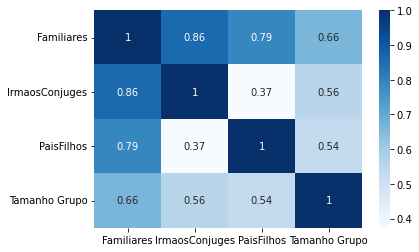

In [ ]:
sns.heatmap(data[['Familiares', 'IrmaosConjuges', 'PaisFilhos', 'Tamanho Grupo']].corr(), annot = True, cmap = 'Blues')

 <a name="sozinho"></a>

### Criar Parâmetro "Sozinho"_(Feature Engeneering)_
Pessoa que não está com nenhum familiar

<br>

[início](#topo)

In [ ]:
sozinho = data['Familiares'] == 0

In [ ]:
data['Sozinho']= sozinho.map({True:1, False:0})

In [ ]:
data.shape

(1309, 24)

## Atualizar train e test 

In [ ]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.head()

,Tarifa,PaisFilhos,IrmaosConjuges,Sobreviveu,Tamanho Grupo,Sobrevivencia Grupo,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Outros,Titulo_Solteira,Expectativa de vida_morrer,Expectativa de vida_viver,Sexo_mulher,Idade,"Faixa etaria_(16.0, 32.0]","Faixa etaria_(32.0, 48.0]","Faixa etaria_(48.0, 64.0]","Faixa etaria_(64.0, 80.0]",Familiares,Sozinho
1,7.2500,0,1,0.0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,22.0,1,0,0,0,1,0
2,71.2833,0,1,1.0,1,1.0,0,0,0,0,0,0,0,0,0,0,1,38.0,0,1,0,0,1,0
3,7.9250,0,0,1.0,1,1.0,0,1,0,1,0,0,0,1,0,0,1,26.0,1,0,0,0,0,1
4,53.1000,0,1,1.0,1,1.0,0,0,0,1,0,0,0,0,0,0,1,35.0,0,1,0,0,1,0
5,8.0500,0,0,0.0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,35.0,0,1,0,0,0,1


In [ ]:
train = data.loc[train.index]

In [ ]:
train.shape

(891, 24)

In [ ]:
data.shape

(1309, 24)

In [ ]:
train.head()

,Tarifa,PaisFilhos,IrmaosConjuges,Sobreviveu,Tamanho Grupo,Sobrevivencia Grupo,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Outros,Titulo_Solteira,Expectativa de vida_morrer,Expectativa de vida_viver,Sexo_mulher,Idade,"Faixa etaria_(16.0, 32.0]","Faixa etaria_(32.0, 48.0]","Faixa etaria_(48.0, 64.0]","Faixa etaria_(64.0, 80.0]",Familiares,Sozinho
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,
1,7.2500,0,1,0.0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,22.0,1,0,0,0,1,0
2,71.2833,0,1,1.0,1,1.0,0,0,0,0,0,0,0,0,0,0,1,38.0,0,1,0,0,1,0
3,7.9250,0,0,1.0,1,1.0,0,1,0,1,0,0,0,1,0,0,1,26.0,1,0,0,0,0,1
4,53.1000,0,1,1.0,1,1.0,0,0,0,1,0,0,0,0,0,0,1,35.0,0,1,0,0,1,0
5,8.0500,0,0,0.0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,35.0,0,1,0,0,0,1


In [ ]:
test = data.loc[test.index]

In [ ]:
test.shape

(418, 24)

In [ ]:
test.drop('Sobreviveu', axis = 1, inplace = True)

In [ ]:
test.shape

(418, 23)

## Utilizar train para treinar o modelo

In [ ]:
X = train.drop('Sobreviveu', axis = 1)

In [ ]:
y = train['Sobreviveu']

In [ ]:
X.shape, y.shape

((891, 23), (891,))

### Escolher colunas

In [ ]:
X.columns

Index(['Tarifa', 'PaisFilhos', 'IrmaosConjuges', 'Tamanho Grupo',
       'Sobrevivencia Grupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'Expectativa de vida_morrer',
       'Expectativa de vida_viver', 'Sexo_mulher', 'Idade',
       'Faixa etaria_(16.0, 32.0]', 'Faixa etaria_(32.0, 48.0]',
       'Faixa etaria_(48.0, 64.0]', 'Faixa etaria_(64.0, 80.0]', 'Familiares',
       'Sozinho'],
      dtype='object')

In [ ]:
recursos = ['Tarifa', 'PaisFilhos', 'IrmaosConjuges', 'Tamanho Grupo',
       'Sobrevivencia Grupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'Expectativa de vida_morrer',
       'Expectativa de vida_viver', 'Sexo_mulher', 'Idade',
       'Faixa etaria_(16.0, 32.0]', 'Faixa etaria_(32.0, 48.0]',
       'Faixa etaria_(48.0, 64.0]', 'Faixa etaria_(64.0, 80.0]', 'Familiares',
       'Sozinho']

In [ ]:
X = X[recursos]

,Tarifa,PaisFilhos,IrmaosConjuges,Tamanho Grupo,Sobrevivencia Grupo,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Outros,Titulo_Solteira,Expectativa de vida_morrer,Expectativa de vida_viver,Sexo_mulher,Idade,"Faixa etaria_(16.0, 32.0]","Faixa etaria_(32.0, 48.0]","Faixa etaria_(48.0, 64.0]","Faixa etaria_(64.0, 80.0]",Familiares,Sozinho
PassengerId,,,,,,,,,,,,,,,,,,,,,,,
1,7.2500,0,1,0,0.0,0,1,0,1,1,0,0,0,0,0,0,22.000000,1,0,0,0,1,0
2,71.2833,0,1,1,1.0,0,0,0,0,0,0,0,0,0,0,1,38.000000,0,1,0,0,1,0
3,7.9250,0,0,1,1.0,0,1,0,1,0,0,0,1,0,0,1,26.000000,1,0,0,0,0,1
4,53.1000,0,1,1,1.0,0,0,0,1,0,0,0,0,0,0,1,35.000000,0,1,0,0,1,0
5,8.0500,0,0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,35.000000,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,13.0000,0,0,0,0.0,1,0,0,1,0,0,1,0,0,0,0,27.000000,1,0,0,0,0,1
888,30.0000,0,0,2,1.0,0,0,0,1,0,0,0,1,0,1,1,19.000000,1,0,0,0,0,1
889,23.4500,2,1,1,0.0,0,1,0,1,0,0,0,1,0,0,1,10.537041,0,0,0,0,3,0


### Averiguando Shapes 

In [ ]:
X.shape, y.shape

((891, 23), (891,))

### Importar train_test_split para dividir e preparar para treino

In [ ]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) #random_stade é o seed

Essa separação entre teste é train é no train original. O test original será usado depois para predição dos sobreviventes. Por isso o shape desse test é 30% de 891, não do total

<a name="ml"></a>

# Machine Learning <a name="modelospred"></a>

<br>

[início](#topo)

## Importando Modelos Preditivos

In [ ]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<a name="LogisticRegression"></a>

### Criar classe ModeloAuxiliar 
Uma classe modelo para evitar duplicação de códigos

In [ ]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [ ]:
modelos = [{'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

In [ ]:
resultados = []
for model in modelos:
  x = ModeloAuxiliar(clf=model['modelo'])
  #treinar o modelo
  x.fit(X_train, y_train)

  #gerar predição
  x_pred = x.predict(X_test) 

  #gerar score
  acuracidade = round(x.score(X_test, y_test)*100, 2)

  resultados.append({'nome': model['nome'],
                    'score': acuracidade,
                    'pred':x_pred})

<a name="ranking"></a>

# Ranking de Modelos Por Score

<br>

[início](#topo)

In [ ]:
models = pd.DataFrame(resultados)

In [ ]:
models[['nome', 'score']].sort_values(by='score', ascending = False)

,nome,score
2,gradboost,91.42
0,logreg,90.30
3,adaboost,90.30
8,LinearSVC,89.93
11,RForest,88.81
6,GaussianNB,85.07
1,etree,84.33
10,Dtree,83.21
5,KNN,75.37
4,SVC,72.76


<a name="cv"></a>

# Validação Cruzada _(Cross-Validation)_

<br>

[início](#topo)

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

O cross validation vai dividir em várias partes para fazer a validação usando parte aleatória dos dados e fazer várias validações. É uma forma mais acurada do que o train_test_split

In [ ]:
kfold = KFold(n_splits=10, random_state = 123, shuffle = True)

In [ ]:
ada = AdaBoostClassifier(n_estimators=200, random_state = 123, learning_rate = 0.1)

In [ ]:
resultado = cross_val_score(ada, X_train, y_train, cv = kfold, scoring='accuracy')

print('O score cross-validado do AdaBoost é:', resultado.mean())

O score cross-validado do AdaBoost é: 0.8891193036354327


In [ ]:
resultado

array([0.93650794, 0.9047619 , 0.9047619 , 0.91935484, 0.90322581,
       0.90322581, 0.85483871, 0.91935484, 0.83870968, 0.80645161])

In [ ]:
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=123)

In [ ]:
ada_pred= ada.predict(X_test)

Kfold é apenas uma técnica para dividir o train e test em partes diferentes, não é Modelo Preditivo. Adaboost é o Modelo.

O que a gente fez foi treinar o dataframe com o modelo do Adaboost, utilizando a técnica KFold realizando assim uma Cross-Validation).

Se a gente não quiser usar a técnica do KFold, podemos utilizar a divisão normal de dados, tal qual escolhemos o percentual do dataframe que desejamos separar para treino e o percentual para teste.

Mas sempre precisaremos dos dois: uma técnica de divisão dos dados:
1. KFold ou divisão comum (model_selection).
2. E precisaremos de um Modelo preditivo (Adaboost, DTree, RForest, etc).

Não tem como fazer o Kfold sem utilizar um modelo preditivo.

<a name="matrix"></a>

# Matriz de Confusão 

Essa média as vezes pode ser enganosa. Nós podemos analisar a Matriz de Confusão _(Confusion Matrix)_ que nos mostra aonde o modelo errou. Falsos Positivos x Falso Negativos.

<br>

[início](#topo)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,ada_pred)

array([[167,   3],
       [ 22,  76]])

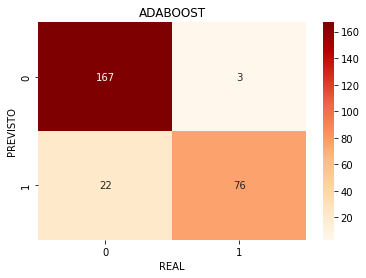

In [ ]:
sns.heatmap(confusion_matrix(y_test, ada_pred), cmap = 'OrRd', annot =True, fmt = '2.0f')
plt.title('ADABOOST')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

### Interpretando a Matriz de Confusão
A diagonal da esquerda mostra o total de predições corretas, a da direita mostra o total de predições erradas.

* O número de predições corretas para AdaBoost é de **167(para mortos) + 76(sobreviventes)**.<br><br>

* **Erros**  
    * Classificou erradamente **3 como mortos (falso negativo)** 
    * E **22 como vivos (falso positivo)**

<a name="precision"></a>

$$Precisão = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Positivos}} $$

A precisão é dada por valores positivos/valores preditos como positivos (por exemplo no caso de spam)

<a name="accuracy"></a>

$$Revocação = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Negativos}} $$

In [ ]:
A revocação é dada pelos valores positivos/os valores totais positivos (por exemplo no caso de uma doença)

<a name="accuracy"></a>

$$Acuracidade = {\frac {Verdadeiros Positivos+Verdadeiros Negativos}{Total}} $$

<a name="accuracy"></a>

$$F1-Score = 2 x{\frac {Precisão \cdot Revocação}{Precisão + Revocação}} $$

### Importando métricas do Sklearn

In [ ]:
from sklearn.metrics import (recall_score, 
                             accuracy_score,
                             precision_score,
                             f1_score)

### Revocação

In [ ]:
recall_score(y_test, ada_pred)

0.7755102040816326

### Acuracidade

In [ ]:
accuracy_score(y_test, ada_pred)

0.9067164179104478

### Precisão

In [ ]:
precision_score(y_test, ada_pred)

0.9620253164556962

### F1-Score

In [ ]:
f1_score(y_test, ada_pred)

0.8587570621468926

<a name="rocauc"></a>

# Curvas ROC e AUC 

O formato da curva contem várias informações, dentre elas, a taxa esperada de falsos positivos e taxa esperada de falsos negativos. 
* O quanto menor for o eixo x menor a quantidade de falsos positivos e maior verdadeiros negativos. 
* Quanto maiores os valores no eixo y, maior a quantidade de verdadeiros positivos e menor a quantidade de falsos negativos.

<br>

[início](#topo)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
ns_probs = [0 for _ in range(len(y_test))] #no skill

In [ ]:
ada_probs = ada.predict_proba(X_test)

In [ ]:
ada_probs = ada_probs[:,1]

In [ ]:
ns_auc = roc_auc_score(y_test, ns_probs)
ns_auc

0.5

In [ ]:
ada_auc = roc_auc_score(y_test, ada_probs)

In [ ]:
ada_auc

0.9338235294117646

In [ ]:
print('Sem habilidade: ROC AUC=%.3f' %(ns_auc))
print('AdaBoost: ROC AUC=%.3f' %(ada_auc))

Sem habilidade: ROC AUC=0.500
AdaBoost: ROC AUC=0.934


In [ ]:
#Calcular a curva ROC
ns_tfp, ns_tvp, _ = roc_curve(y_test, ns_probs)
ada_tfp, ada_tvp, _ = roc_curve(y_test, ada_probs)

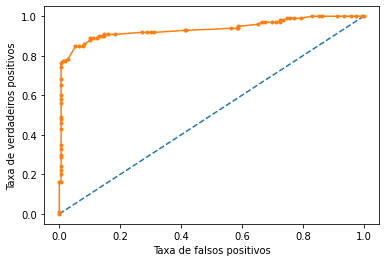

In [ ]:
plt.plot(ns_tfp, ns_tvp, linestyle = '--', label='Sem habilidade')
plt.plot(ada_tfp, ada_tvp, marker = '.', label='AdaBoost')

plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')

plt.show()

In [ ]:
https://www.youtube.com/watch?v=4jRBRDbJemM
Para entender bem o que é ROC (Receiver Operator Characteristic) é AUC (area under the curve)

ROC curves make it easy to identify the best threshold for making a decision.
AUC can help decide which category method is better

## Selecionando Threshold (Limite)

In [ ]:
pred_proba = ada_probs >= 0.4

In [ ]:
pred_proba = pd.Series(pred_proba).map({True:1, False:0}).values

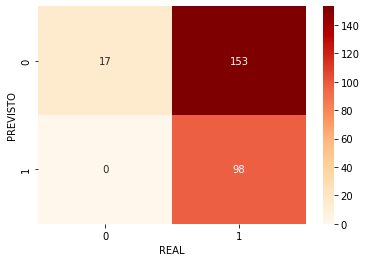

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred_proba), annot = True, cmap = 'OrRd', fmt = '2.0f')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

<a name="hyperparam"></a>

# Customização de Hyper-Parâmetros 

<br>

[início](#topo)

**Parâmetros**

**n_jobs**: Quantidade de núcleos do CPU usados no processo de treino do modelo preditivo. Se for -1, todos os núcleos serão usados.

**n_estimators**: Quantidade de árvores de classificação usadas no modelo preditivo (10 é o padrão)

**max_depth**: Profundidade de árvore ou a quantidade de nós que ela deve se expandir. Se esse valor for muito alto, existe a chance de o modelo super-adequar _(overfit)_ o modelo.

**min_samples_leaf**: O número mínimo de amostras requeridas para ser considerado um ramo. Isso tende a suavizar o modelo.

**verbose**: Controla a saída de textos durante o processo de aprendizagem/treino. O valor 0 não mostra nenhum texto, enquanto 3 mostra o processo de aprendizagem de árvore a cada iteração.

In [ ]:
from sklearn.model_selection import GridSearchCV

* ### Random Forest

In [ ]:
rf_params = {
    'n_estimators' : [100,200],
    'max_depth' : [2,4],
    'min_samples_leaf':[1,2,3]
}

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=123), param_grid = rf_params, verbose=True)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.8908903225806452
RandomForestClassifier(max_depth=4, random_state=123)


In [ ]:
gd.best_estimator_

RandomForestClassifier(max_depth=4, random_state=123)

In [ ]:
gd_pred = gd.predict(X_test)
gd_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

<a name="ensembling"></a>

# Ensembling
Uma forma de aumentar a acuracidade ou performance do modelo preditivo. Ensembling é a combinação de vários modelos preditivos de forma a ter uma versão final mais poderosa e mais estável. Ensembling pode ser feito de 3 formas:
* Classificão de Votos (Voting Classifier)
* Ensacamento (Bagging)
* Impulsionamento (Boosting)

<br>

[início](#topo)

<a name="voting"></a>

* ### Classificação de Votos

In [ ]:
misturados = [('KNN',KNeighborsClassifier(n_neighbors=10)),
                  ('RBF',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                  ('RFor',RandomForestClassifier(n_estimators=100,random_state=123)),
                  ('LR',LogisticRegression(C=0.05)),
                  ('DT',DecisionTreeClassifier(random_state=123)),
                  ('NB',GaussianNB()),
                  ('svm',SVC(kernel='linear',probability=True))
                 ]

In [ ]:
from sklearn.ensemble import VotingClassifier

meu_ensemble = VotingClassifier(estimators=misturados, voting='soft').fit(X_train,y_train)

print('Score', meu_ensemble.score(X_test, y_test))
cross = cross_val_score(meu_ensemble,X_test, y_test, cv=10, scoring='accuracy') 
print('Score cross-validado', cross.mean())

Score 0.9029850746268657
Score cross-validado 0.877065527065527


In [ ]:
meu_ensemble

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                             ('RBF', SVC(C=0.5, gamma=0.1, probability=True)),
                             ('RFor', RandomForestClassifier(random_state=123)),
                             ('LR', LogisticRegression(C=0.05)),
                             ('DT', DecisionTreeClassifier(random_state=123)),
                             ('NB', GaussianNB()),
                             ('svm', SVC(kernel='linear', probability=True))],
                 voting='soft')

<a name="bagging"></a>

* ### Ensacamento
O Ensacamento aplica classificadores similares em pequenas partições, depois tira a média reduzindo a variância. Diferente da técnica de Classificação de Votos, Ensacamento usa classificadores similares aumentando a estabilidade. 

* #### Ensacamento KNN
Ele é ideal para usar com modelos que possuem muita variância. Pode ser usado com um pequeno valor de n_neighbours, como com um pequeno valor de n_estimators.

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
knn=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state = 123, n_estimators=100)

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
print('Score', knn.score(X_test, y_test))
cross = cross_val_score(knn,X_test, y_test, cv=10, scoring='accuracy') 
print('Score cross-validado', cross.mean())

Score 0.7313432835820896
Score cross-validado 0.7237891737891738


* #### Ensacamento DecisionTree


In [ ]:
dtree=BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state = 123, n_estimators=100)

dtree.fit(X_train, y_train)

dtree_pred = dtree.predict(X_test)
print('Score', dtree.score(X_test, y_test))
cross = cross_val_score(dtree,X_test, y_test, cv=10, scoring='accuracy') 
print('Score cross-validado', cross.mean())

Score 0.8880597014925373
Score cross-validado 0.8810541310541311


<a name="boosting"></a>

* ### Impulsionamento
Impulsionamento é uma técnica ensembling que usa aprendizado sequenciado de classificadores. É um melhoramento gradual de um modelo fraco. O modelo é treinado no dataframe completo, de forma a focar nos erros, tentando melhorá-los iterativamente de forma contínua. 

* #### Exemplos (Impulsionamento Adaptativo): 
    * AdaBoost  
    * GradientBoostingClassifier 
<br>

[início](#topo)

* ### GradientBoostingClassifier

In [ ]:
grad =  GradientBoostingClassifier(n_estimators=100, random_state=123, learning_rate=0.1)
grad.fit(X_train, y_train)
grad_pred = grad.predict(X_test)
cross=cross_val_score(grad, X_train, y_train, cv=10, scoring='accuracy')

print('Score', grad.score(X_test, y_test))
print('Score cross-validado', cross.mean())

Score 0.914179104477612
Score cross-validado 0.8796466973886329


* ### Configurando Hyper-Parâmetros para o AdaBoost

In [ ]:
n_estimator = [100,200]
learn_rate = [0.05, 0.1, 0.3]

hyper={'n_estimators':n_estimator, 'learning_rate':learn_rate}

gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X_train, y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8909032258064518
AdaBoostClassifier(learning_rate=0.05, n_estimators=200)


In [ ]:
adaboost_pred = gd.predict(X_test)

<a name="combinado"></a>

<a name="fimportance"></a>

# Importância de Recursos _(Feature Importance)_ 

<br>

[início](#topo)

In [ ]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 100,
    'max_depth': 2,
    'min_samples_leaf': 2,
    'verbose': 0
}

In [ ]:
rf = ModeloAuxiliar(clf=RandomForestClassifier, seed=123, params=rf_params)

In [ ]:
rf_features = rf.feature_importances(X_train,y_train)

In [ ]:
rf_features

array([2.94250613e-02, 1.83193867e-03, 1.71989551e-03, 1.17323787e-01,
       2.57965774e-01, 1.58227448e-03, 4.57748671e-02, 0.00000000e+00,
       4.31715840e-03, 1.33572495e-01, 2.58505384e-03, 1.35296468e-03,
       5.76649312e-02, 3.18320535e-02, 9.04474584e-02, 1.97502758e-01,
       4.50429218e-03, 1.14514689e-05, 2.61162590e-04, 1.99676660e-04,
       0.00000000e+00, 1.31186480e-02, 7.00629805e-03])

In [ ]:
cols = X_train.columns.values
cols

array(['Tarifa', 'PaisFilhos', 'IrmaosConjuges', 'Tamanho Grupo',
       'Sobrevivencia Grupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino',
       'Titulo_Outros', 'Titulo_Solteira', 'Expectativa de vida_morrer',
       'Expectativa de vida_viver', 'Sexo_mulher', 'Idade',
       'Faixa etaria_(16.0, 32.0]', 'Faixa etaria_(32.0, 48.0]',
       'Faixa etaria_(48.0, 64.0]', 'Faixa etaria_(64.0, 80.0]',
       'Familiares', 'Sozinho'], dtype=object)

In [ ]:
feature_dataframe = pd.DataFrame({'recursos': cols, 
                                  'Importância de Recursos RForest': rf_features})

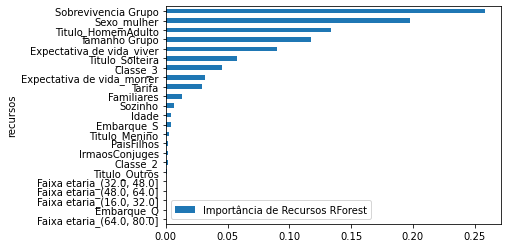

In [ ]:
feature_dataframe.sort_values(by='Importância de Recursos RForest').plot.barh(x='recursos')

Sabendo que as faixas etárias não estão ajudando, podemos apagá-las, e verificar o score, o cross_validation, etc

In [ ]:
meu_ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                             ('RBF', SVC(C=0.5, gamma=0.1, probability=True)),
                             ('RFor', RandomForestClassifier(random_state=123)),
                             ('LR', LogisticRegression(C=0.05)),
                             ('DT', DecisionTreeClassifier(random_state=123)),
                             ('NB', GaussianNB()),
                             ('svm', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [ ]:
meu_ensemble.score(X_test, y_test)

0.9029850746268657

In [ ]:
test[recursos].shape

(418, 23)

In [ ]:
X_test.shape

In [ ]:
ensemble_pred = meu_ensemble.predict(test[recursos])

In [ ]:
ensemble_pred.shape

(418,)

In [ ]:
test.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

<a name="submissao"></a>

# Submissão

<br>

[início](#topo)

In [ ]:
submissao = pd.DataFrame({
    'PassengerId': test.index,
    'Survived': ensemble_pred
})

In [ ]:
submissao.shape

(418, 2)

In [ ]:
submissao['Survived'] = submissao['Survived'].astype('int')

para submissão é necessário que os valores sejam inteiros

In [ ]:
submissao.to_csv('meu_ensemble.csv', index=False)

In [ ]:
submissao

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


O modelo ficou superadequado (overfit), o que significa que ele responde bem somente para os dados do treino, mas para outros ele gera um score baixo. Foram usadas muitas estratégias e que isso deixou sobrecarregado. Talvez seguir somente uma estratégia, ou seguir um ponto de vista mais fixo, deixe-o menos confuso e não superadequado.